<h2>Problem Definition</h2>

People are always confused about their medical insurance and don't know the cost of insurance at different ages and conditions. This data is useful for these people and is useful to make predictions of the insurance cost they will have to pay.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

<h2>LOADING DATA</h2>

In [2]:
data = pd.read_csv('./archive/insurance.csv')

In [3]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

<h2>UNDERSTANDING DATA</h2>

In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe().T

count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
print(data.dtypes)
data.head()

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

<h2>DATA PREPROCESSING</h2>

In [9]:
data['sex'] = data['sex'].astype('category')
data['region'] = data['region'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

<h2>EDA</h2>

In [10]:
sns.set_style('whitegrid')

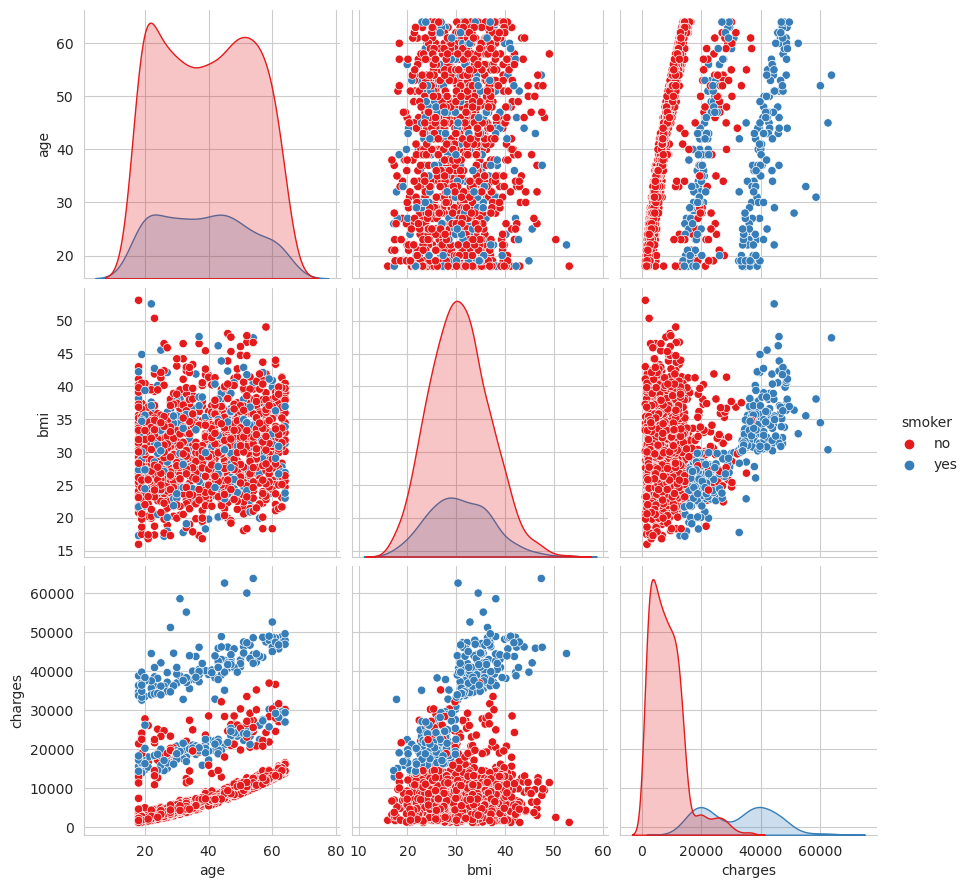

In [11]:
sns.pairplot(
    data[['age','bmi','charges','smoker']],
    hue = 'smoker',
    height=3,
    palette='Set1'
)

<AxesSubplot:>

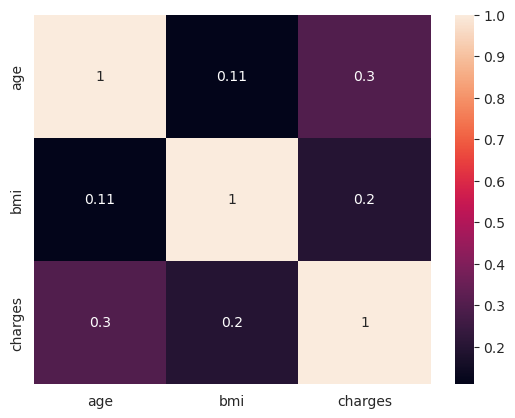

In [12]:
sns.heatmap(data[['age','bmi','charges']].corr(),annot=True)

<h2>Feature Selection and Engineering</h2>

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaling_data = data[['age','bmi','children']]

In [14]:
data = data.drop(columns=['age','bmi','children'],axis=1)
data.head()

sex smoker     region      charges
0  female    yes  southwest  16884.92400
1    male     no  southeast   1725.55230
2    male     no  southeast   4449.46200
3    male     no  northwest  21984.47061
4    male     no  northwest   3866.85520

In [15]:
scaled_data = pd.DataFrame(scaler.fit_transform(scaling_data),columns=['age','bmi','children'])
data = pd.concat([scaled_data,data],axis=1)
data.head()

age       bmi  children     sex smoker     region      charges
0  0.021739  0.321227       0.0  female    yes  southwest  16884.92400
1  0.000000  0.479150       0.2    male     no  southeast   1725.55230
2  0.217391  0.458434       0.6    male     no  southeast   4449.46200
3  0.326087  0.181464       0.0    male     no  northwest  21984.47061
4  0.304348  0.347592       0.0    male     no  northwest   3866.85520

In [16]:
data = pd.get_dummies(data) #onehotencoding
data.shape

(1338, 12)

In [17]:
data.head()

age       bmi  children      charges  sex_female  sex_male  smoker_no  \
0  0.021739  0.321227       0.0  16884.92400        True     False      False   
1  0.000000  0.479150       0.2   1725.55230       False      True       True   
2  0.217391  0.458434       0.6   4449.46200       False      True       True   
3  0.326087  0.181464       0.0  21984.47061       False      True       True   
4  0.304348  0.347592       0.0   3866.85520       False      True       True   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0        True             False             False             False   
1       False             False             False              True   
2       False             False             False              True   
3       False             False              True             False   
4       False             False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             False

In [18]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

<h2>BUILDING MODEL</h2>

In [19]:
y = data['charges']
y.head().round(2)

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: charges, dtype: float64

In [20]:
X = data.drop('charges',axis=1)
X.head()

age       bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.021739  0.321227       0.0        True     False      False        True   
1  0.000000  0.479150       0.2       False      True       True       False   
2  0.217391  0.458434       0.6       False      True       True       False   
3  0.326087  0.181464       0.0       False      True       True       False   
4  0.304348  0.347592       0.0       False      True       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0             False             False             False              True  
1             False             False              True             False  
2             False             False              True             False  
3             False              True             False             False  
4             False              True             False             False

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    train_size=0.80,
    random_state=1
)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

<h2>MODEL EVALUATION</h2>

In [26]:
model.score(X_test,y_test).round(2)

0.76

In [27]:
model.score(X_train,y_train).round(2)

0.75

If the performance of the model on the training data was high, it would mean that there is an <b>overfitting</b> problem. To overcome the overfitting problem, we can use <b>regularization</b>. Ridge or lasso models can be used for this.

In [28]:
y_pred = model.predict(X_test)
print(y_test[0:5])
y_pred[0:5]

559      1646.4297
1087    11353.2276
1020     8798.5930
460     10381.4787
802      2103.0800
Name: charges, dtype: float64


array([ 4352., 12864., 12864., 13760.,   704.])

# Metrics

In [29]:
from sklearn.metrics import mean_squared_error
import math

In [30]:
math.sqrt(mean_squared_error(y_test, y_pred))

5964.903470833803

<h2>MODEL PREDICTION</h2>

In [31]:
data_row_1 = X_train[:1]
data_row_1

age       bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
216  0.76087  0.286252       0.0        True     False       True       False   

     region_northeast  region_northwest  region_southeast  region_southwest  
216             False              True             False             False

In [32]:
model.predict(data_row_1).round(2)

array([10560.])

In [33]:
y_train[:1].round(2)

216    10355.64
Name: charges, dtype: float64

# libs for EDA 

> pandas_profiling
> sweetwiz
> dtale
> autowiz 

In [34]:
from sklearn.datasets import load_iris
import pandas as pd

In [35]:
data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [38]:
df.shape

(150, 4)

In [39]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [40]:
df['target'] = data.target

In [41]:
df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
145       2  
146       2  
147       2  
148       2  
149       2

# Autowiz

In [42]:
from autoviz import AutoViz_Class
from matplotlib import pyplot as pyplot
%matplotlib inline
AV = AutoViz_Class()

Imported v0.1.730. After importing autoviz, execute '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


Shape of your Data Set loaded: (150, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    5 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix data quality issues automatically, import FixDQ from autoviz...
    Alert: Dropping 1 duplicate rows can sometimes cause column data types to change to object. Double-check!


AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

Number of All Scatter Plots = 10


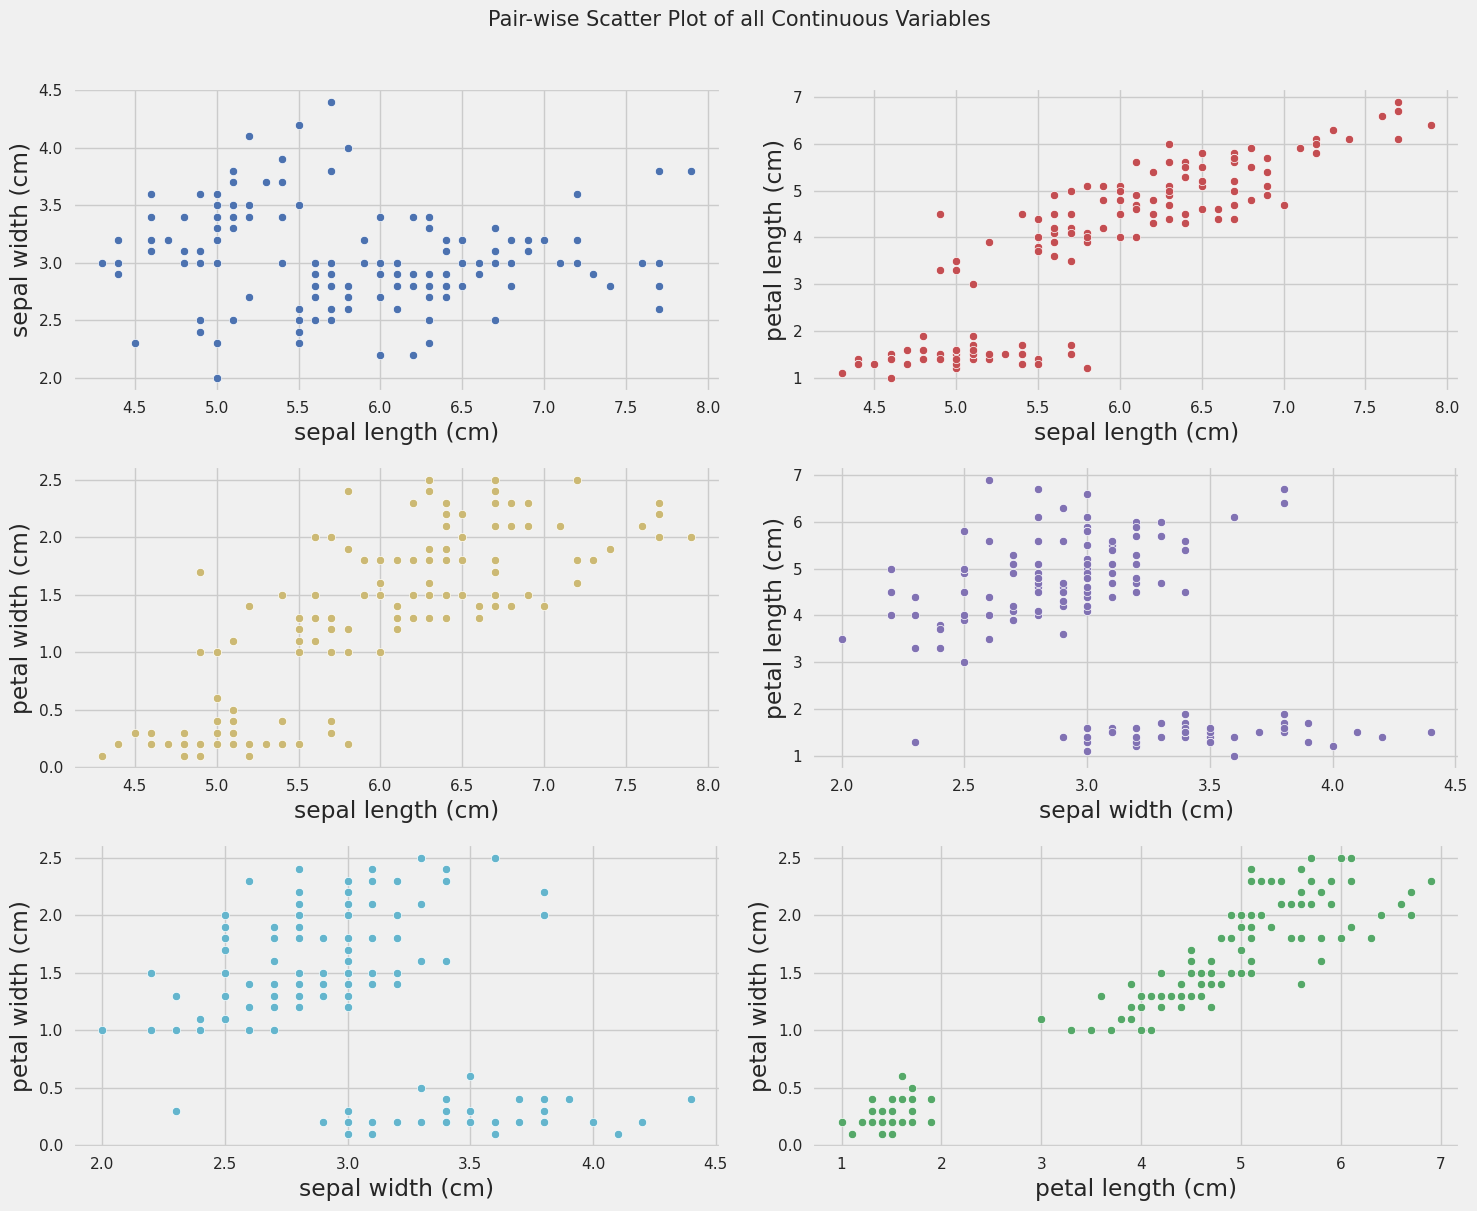

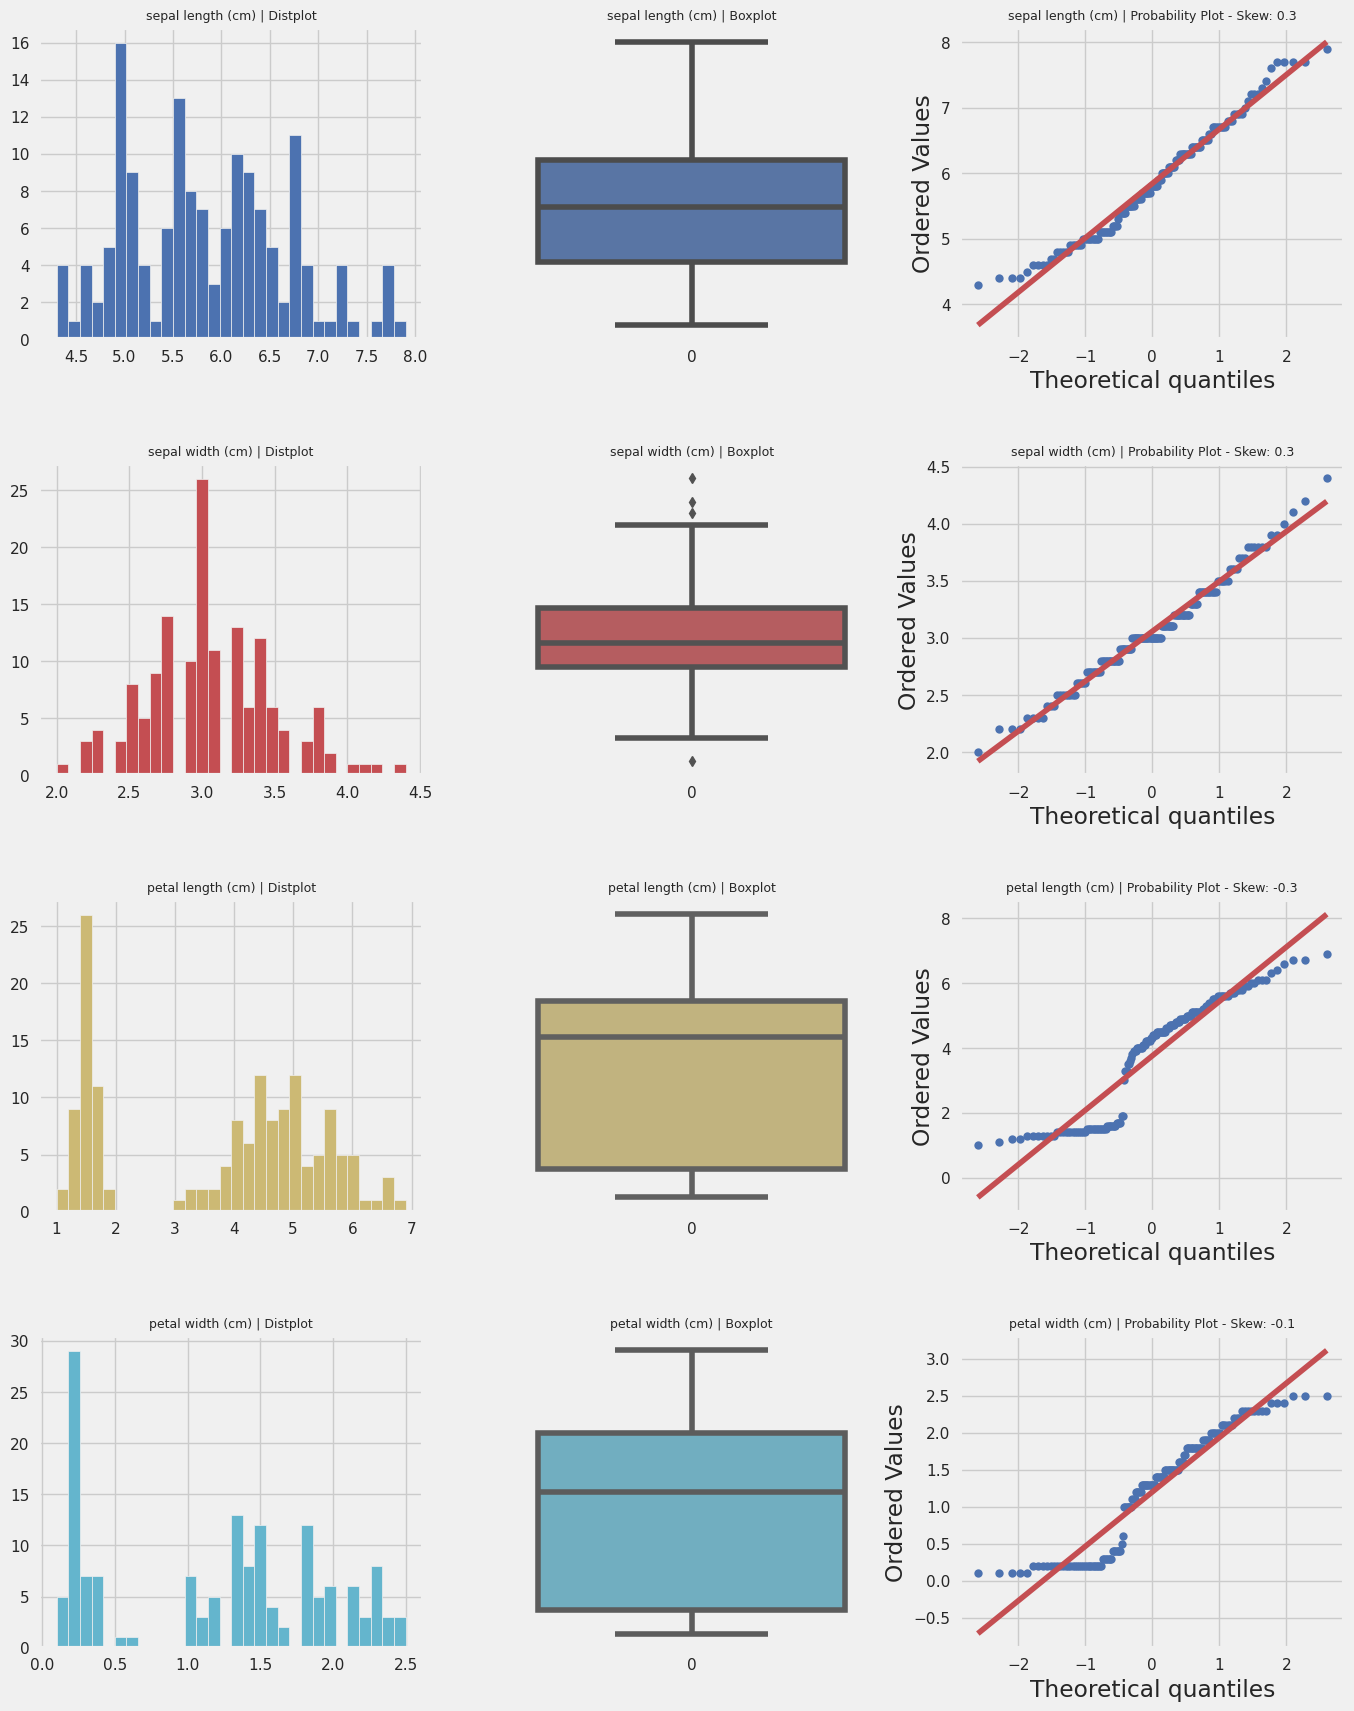

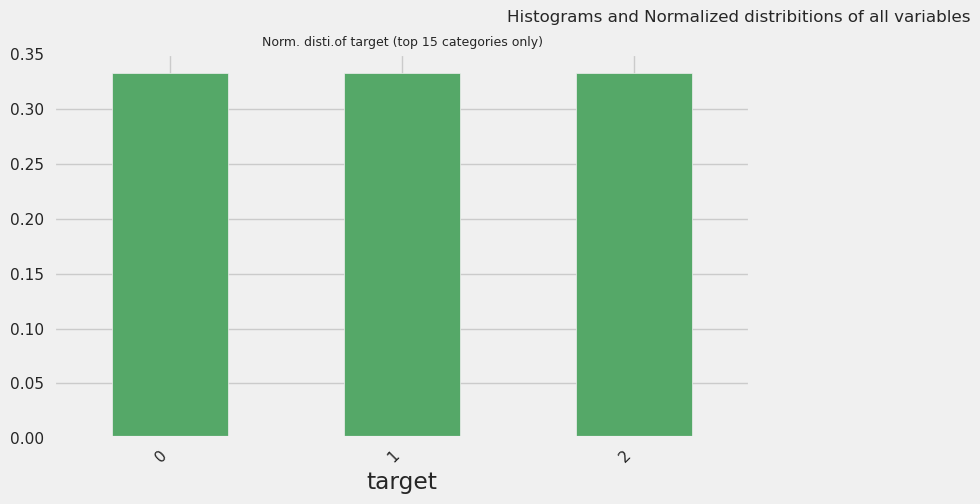

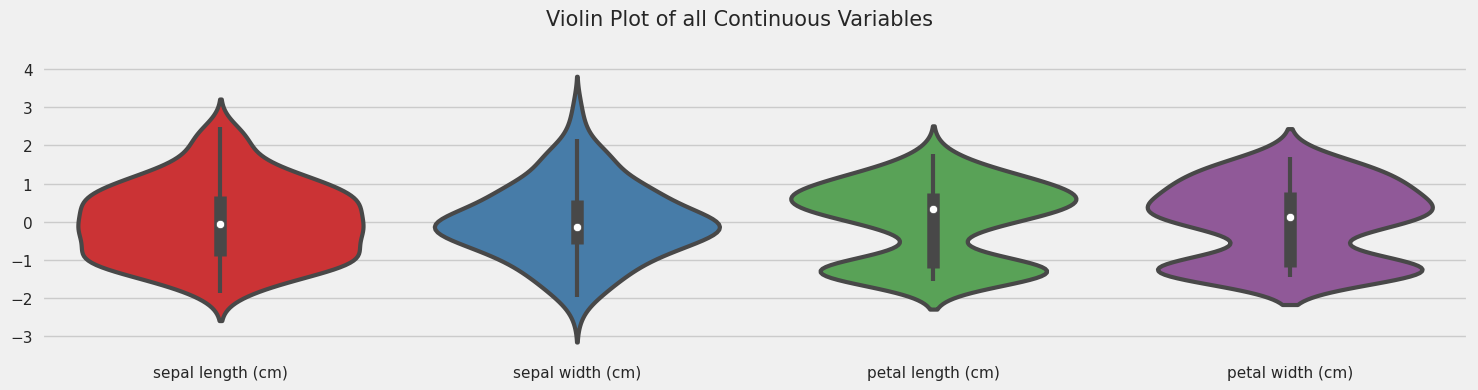

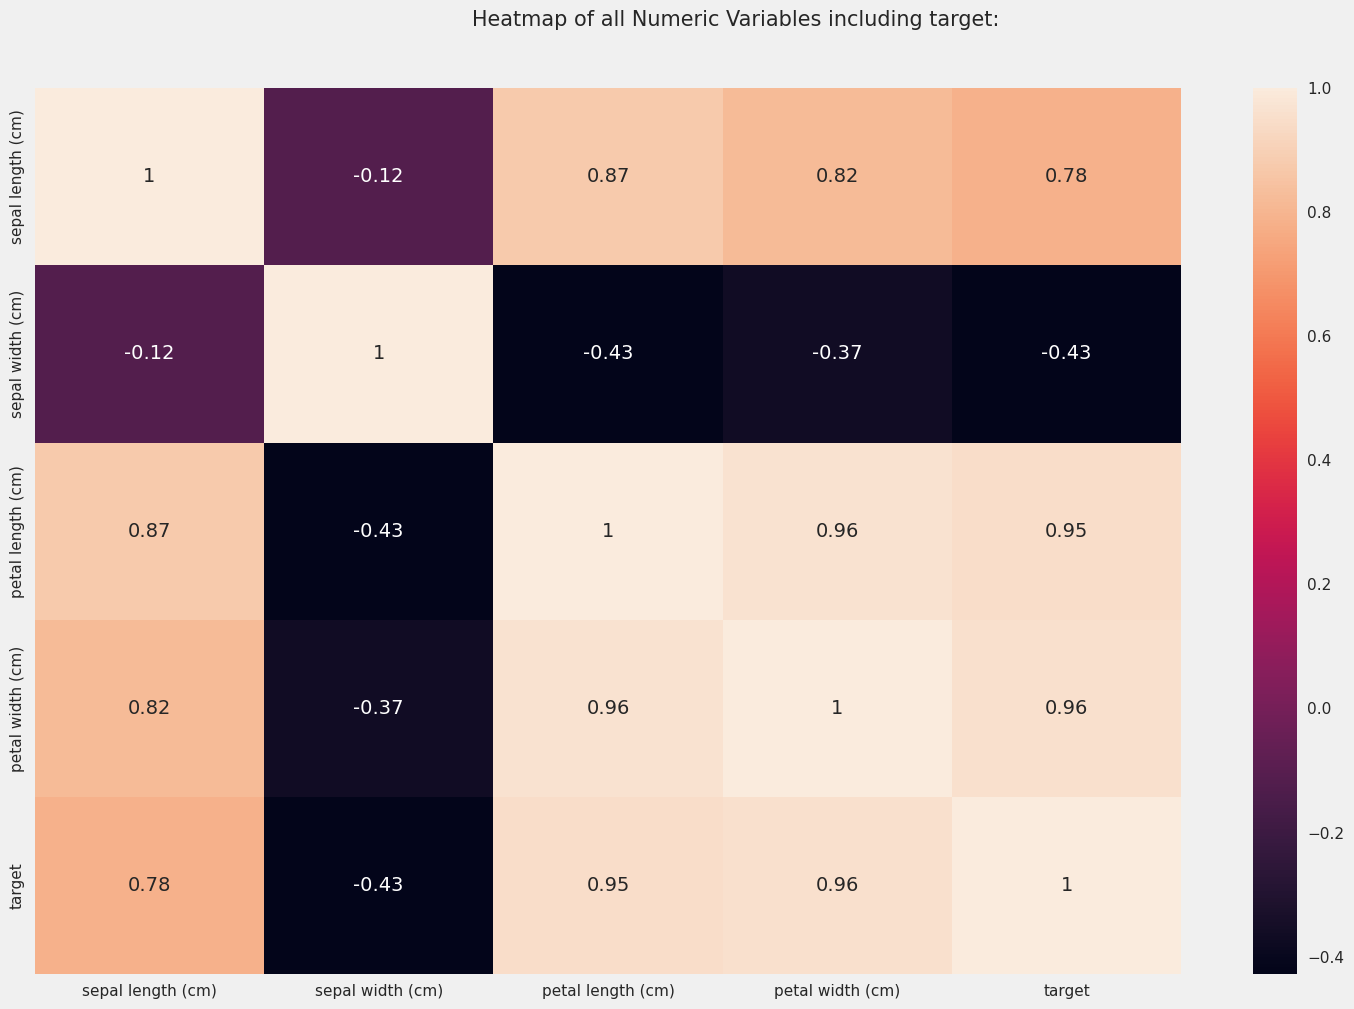

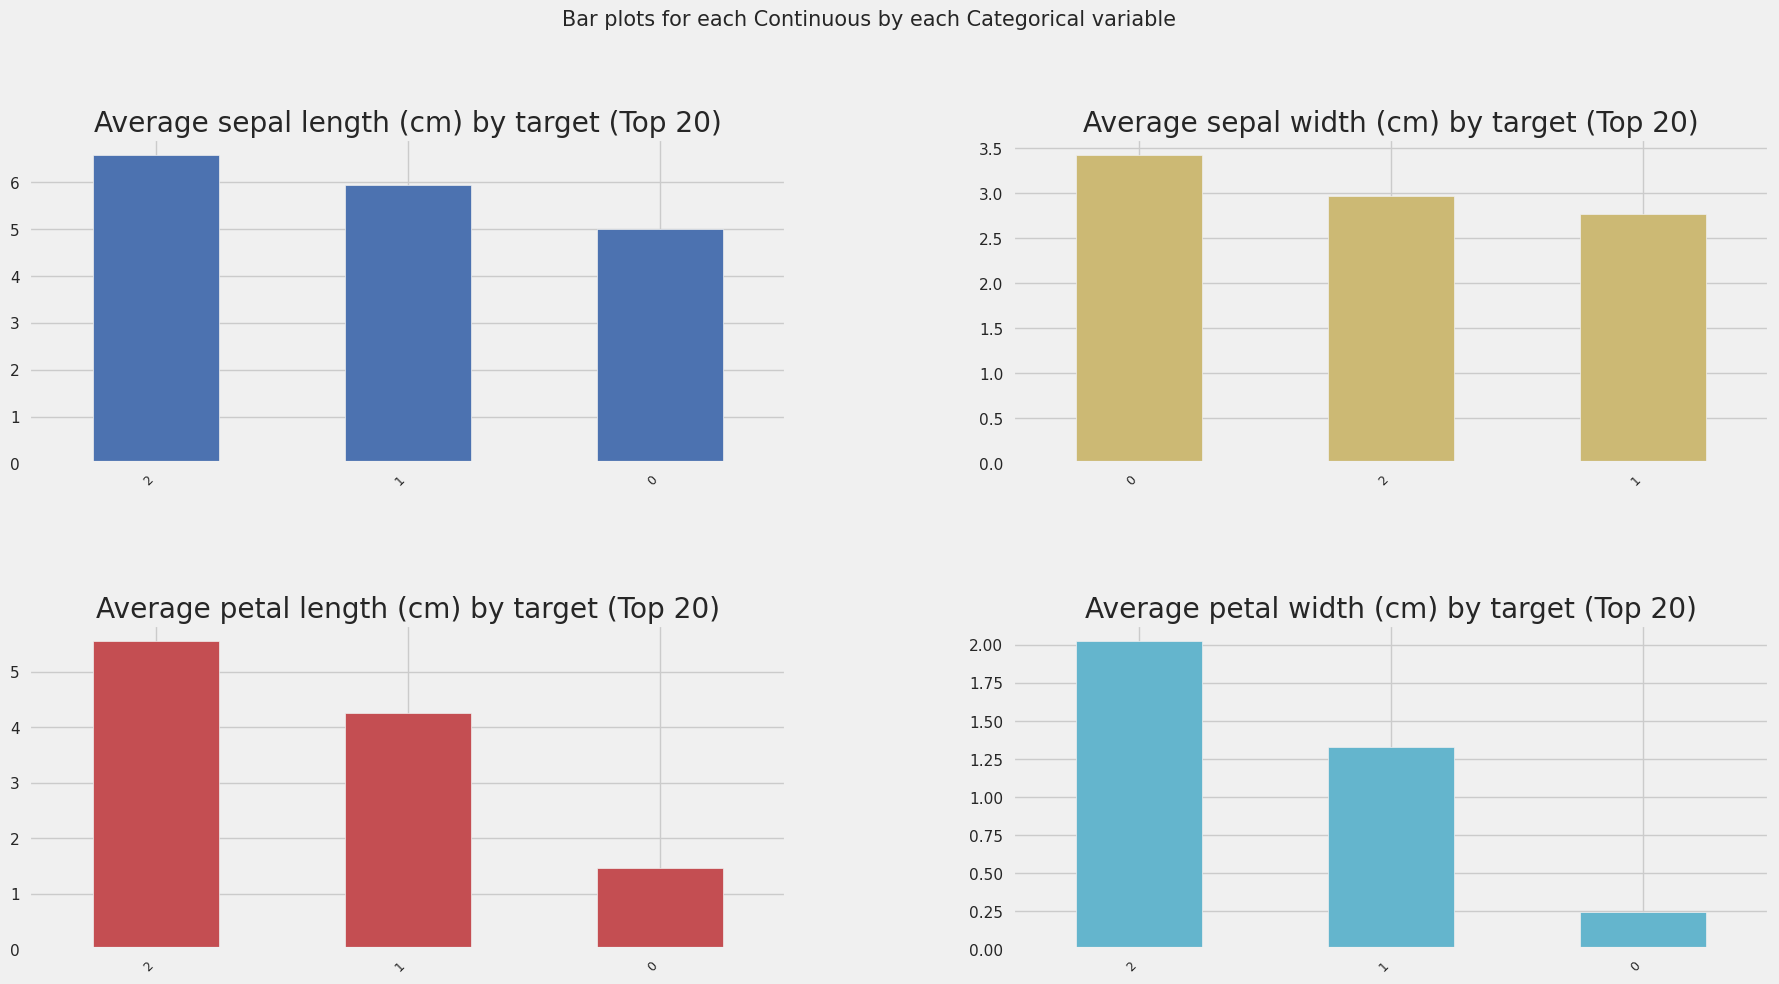

All Plots done
Time to run AutoViz = 10 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [43]:
df.to_csv('iris.csv',index=False)
fhand = './iris.csv'
dft = AV.AutoViz(fhand)